<a href="https://colab.research.google.com/github/TalCordova/TensorFlow_Course/blob/main/10_time_series_forecasting_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time serires forecasting fundamentals with TensorFlow + Milestone Project 3: BitPredict

Let's write some TensorFlow code to predict the price of BitCoin.

Links:
* All resources: https://github.com/mrdbourke/tensorflow-deep-learning
* Book version of actual code\text: https://dev.mrdbourke.com/tensorflow-deep-learning/#important-links

## Get data

we're going to use the historical price of Bitcoin to try and predict the future proce of Bitcoin, we downloaded the data from here: https://www.coindesk.com/price/bitcoin/

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2022-12-07 06:35:40--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.1’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.006s  

2022-12-07 06:35:41 (30.7 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.1’ saved [178509/178509]



## Importing time series data

In [ ]:
# Import with pandas
import pandas as pd
# Let's read in our Bitcoin data and parse the dates
df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates = ["Date"],
                 index_col = ["Date"]) # Pass the date column and tell pandas column 1 is a datetime

df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [ ]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [ ]:
# How many samples do we have?
len(df)

2787

We've collected the historical proce of Bitcoin for the past ~8 years, but there's 2787 samples.

Typically deep learning models like lots ans lots and lots and lots of samples (where lots and lots and lots can be thousands to tens of thousands to millions).

A smaller number of samples is something you'll often run into with time series data problems.

> **Note:** The **seasonality** of a time series dataset is referred to the number of samples per year. So for our Bitcoin data, it has a seasonality of daily or value of 365 because we collect one sample per day meaning we'll get 365 samples per year.

In [ ]:
# Only want closing proce for each day
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


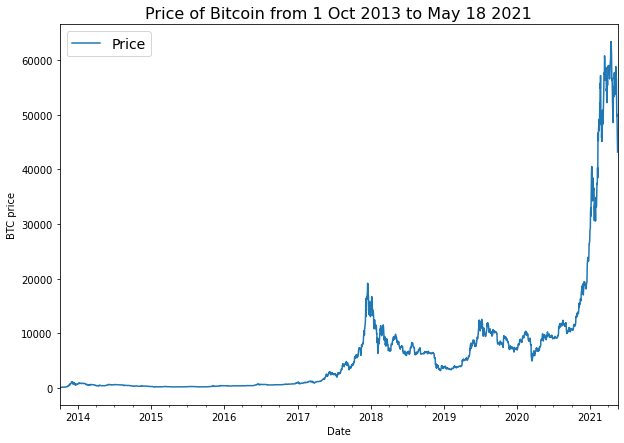

In [ ]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize = (10, 7))
plt.ylabel("BTC price")
plt.title("Price of Bitcoin from 1 Oct 2013 to May 18 2021", fontsize = 16)
plt.legend(fontsize = 14)

## Import time series data with Python's CSV module

In [ ]:
# Importing and formatting historical Bitcoin data with Python
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter = ",") # create iterator
  next(csv_reader) # skip first line (this gets rid of column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], '%Y-%m-%d')) # get the dates as dated not strings
    btc_price.append(float(line[2])) # get close time as float

# View first ten of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

Text(0.5, 0, 'Date')

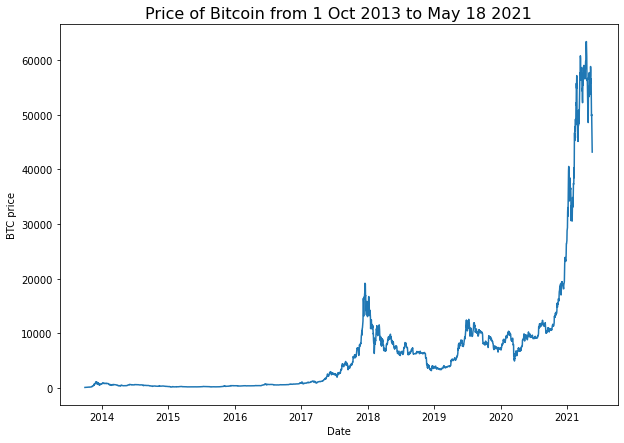

In [ ]:
# Plot from csv
import matplotlib.pyplot as plt
# import numpy as np
plt.figure(figsize = (10, 7))
plt.plot(timesteps, btc_price)
plt.ylabel("BTC price")
plt.title("Price of Bitcoin from 1 Oct 2013 to May 18 2021", fontsize = 16)
plt.xlabel("Date")

## Format data part 1:Create train and test sets of our time series data

### Creating train and test with time series data (the wrong way)

In [ ]:
# Get bitcoin data array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [ ]:
# Wrong way to make train/test sets for time series data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps, #dates
                                                    prices, # BTC prices
                                                    test_size = 0.2,
                                                    random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

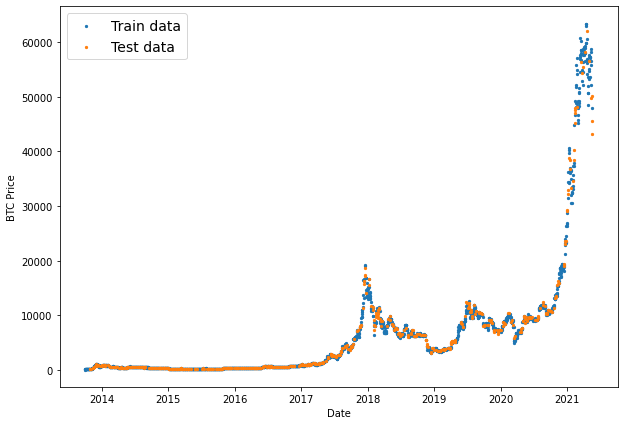

In [ ]:
# Let's plot wrong train and test split
plt.figure(figsize = (10, 7))
plt.scatter(X_train, y_train, s = 5, label = "Train data")
plt.scatter(X_test, y_test, s = 5, label = "Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize = 14)
plt.show();

### Create train and test sets for time series (the right way)

In [ ]:
# Create and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test - you can change these values as needed

# Create train data splits (everything before split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

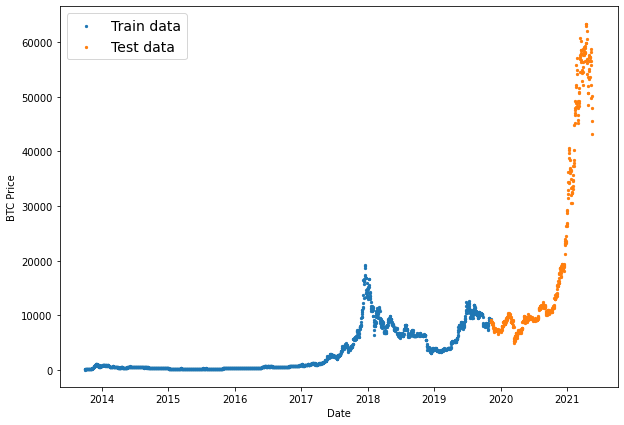

In [ ]:
# Plot correctly made splits
plt.figure(figsize = (10,7))
plt.scatter(X_train, y_train, s = 5, label = "Train data")
plt.scatter(X_test, y_test, s = 5, label = "Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize = 14)
plt.show();

## Create a plotting function

Typing plotting code is tedious, let's functionize it.

In [ ]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format = ".", start = 0, end = None, label = None):
  """
  Plot timesteps (a seires of points in time) against values (a series of values across timestep)
  
  Parameters:
  -----------
  timesteps: array of timestep values
  values: array of values across time
  format: styule of plot, default "."
  start: where to start the plot (setting a value will index from start to timesteps & values)
  end: where to end the plot (similar to start but for the end)
  label: label to show on plot about values, default None
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label = label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize = 14) # Make label bigger
  plt.grid(True)

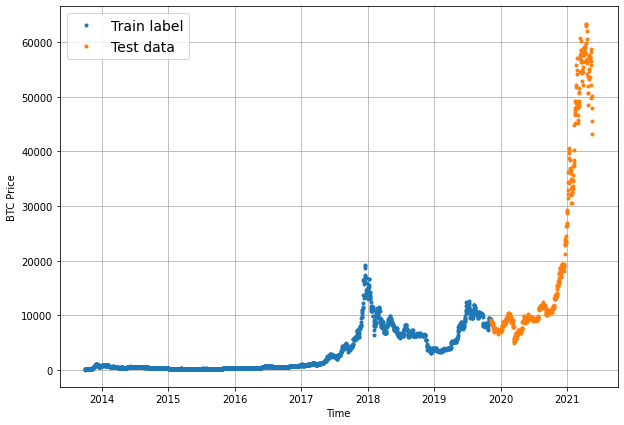

In [ ]:
# Test our plotting function
plt.figure(figsize = (10, 7))
plot_time_series(timesteps = X_train, values = y_train, label = "Train label")
plot_time_series(timesteps = X_test, values = y_test, label = "Test data")

## Modelling experiments

We've got some Bitcoin historical data, to model it, let's run a series of modelling experiments and see which model performs best.

Terms to be familiar with:

* **Horizon** = number of timesteps into the future we're going to predict
* **Window size** = number of timesteps we're going to use to predict horizon

Modelling experiments we're running:

0. Naïve model (baseline)
1. Dense model, horizon = 1, window = 7
2. Same as 1, horizon = 1, window = 30
3. Same as 1, horizon = 7, window = 30
4. Conv1D
5. LSTM
6. Same as 1 (but with multivariate data)
7. N-BEATs Algorithm
8. Ensemble (multiple models optimized on different loss functions)
9. Future prediction model (model to predict future values)
10. Same as 1 (but with turkey 🦃 data introduced)


## Model 0: Naive forecast (baseline)

The formula looks like this:

$$\hat{y}_{t} = y_{t-1}$$

In english:
> The prediciton at timestep t (y-hat) is equal to the value at timestep t-1 (previous timestep) - this is for the horizon of 1.

In [ ]:
naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

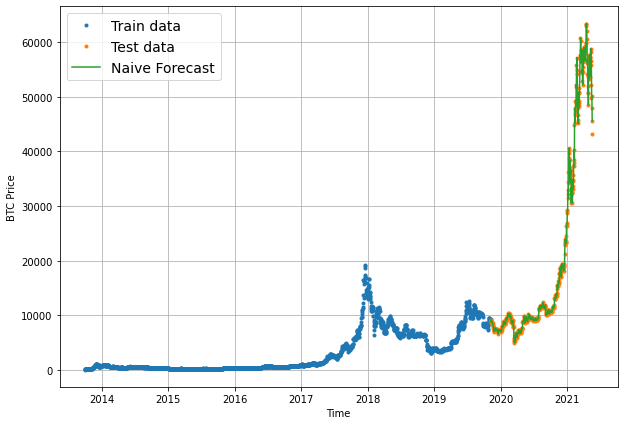

In [ ]:
# Plot naive forecast
plt.figure(figsize = (10,7))
plot_time_series(timesteps = X_train, values = y_train, label = "Train data")
plot_time_series(timesteps = X_test, values = y_test, label = "Test data")
plot_time_series(timesteps = X_test[1:], values = naive_forecast, format = "-", label = "Naive Forecast")

## Evaluating a time series model

Let's look into some evaluation metrics for time series forecasting.

What are we doing?

We're predicting a number, so that means we have a form of a regression problem.

Because we're working on a regression probelm, we'll need some regression-like metrics.

A few common regression metrics (which can also be used for time series forecasting):
* MAE - mean absolute error
* MSE - mean square error
* RMSE - root mean square error
* MAPE/sMAPE - (symmetric) mean absolute percentage error
* MASE - mean absolute scaled error
For all of the above metrics, lower is better, for example, an MAE of 0 that is better than an MAE of 100.

For all of the above, **lower is better**, for example, an MAE of 0 is better than an MAE of 100.

The main thing we're evaluating here is: **how do our model's forecasts (y_pred) compare against the actual values (y_true or ground truth values)?**

>📖 Resource: For a deeper dive on the various kinds of time series forecasting methods see [Forecasting: Principles and Practice chapter 5.8](https://otexts.com/fpp3/accuracy.html)



In [ ]:
import tensorflow as tf

In [ ]:
# MASE implementation
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data)
  """
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:]- y_true[:-1])) # our seasonality is 1 day (hence the shift of 1)

  return mae/mae_naive_no_season

In [ ]:
mean_absolute_scaled_error(y_true = y_test[1:], y_pred = naive_forecast).numpy()

0.9995699939182624

In [ ]:
# Create a function to take in model predictions and truth values and return evaluation metrics
def evaluate_preds(y_true, y_pred):
  # Make sure float32 datatype (for metric calculation)
  y_true = tf.cast(y_true, dtype = tf.float32)
  y_pred = tf.cast(y_pred, dtype = tf.float32)

  # Calculate various evaluation metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

That's one good looking evaluation function!

Let's now see if it works

In [ ]:
naive_results = evaluate_preds(y_true = y_test[1:],
                               y_pred = naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

## Other models you can use for baseline and for actual forecasts

In this notebbok, we're focused on TensorFlow and deep learning models.

However, there are plenty of ither styles of time series forecasting models you may want to experiment with: https://dev.mrdbourke.com/tensorflow-deep-learning/10_time_series_forecasting_in_tensorflow/#other-kinds-of-time-series-forecasting-models-which-can-be-used-for-baselines-and-actual-forecasts

## Format Data Part 2: Windowing our dataset

Why do we window?

We window our time series dataset to turn our data into a supervised learning problem

```
Windowing for one week:
[0, 1, 2, 3, 4, 5, 6] --> [7]
[1, 2, 3, 4, 5, 6, 7] --> [8]
[2, 3, 4, 5, 6, 7, 8] --> [9]
```

In [ ]:
# What we want to do with our Bitcoin data
print(f"We want to use: {btc_price[:7]} to predict this: {btc_price[7]}")

We want to use: [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict this: 123.033


In [ ]:
# Let's setup globa; variables for window and horizon size
HORIZON = 1 # predict next 1 day
WINDOW_SIZE = 7 # use the past week of Bitcoin data to make the prediction

In [ ]:
# Create function to label windowed data
def get_labelled_windows(x, horizon = HORIZON):
  """
  Creates labels for windowed dataset.

  E.g. if horizon = 1
  Input: [0, 1, 2, 3, 4, 5, 6, 7] --> Output: ([0, 1, 2, 3, 4, 5, 6, 7])
  """
  return x[:, :-horizon], x[:,-horizon:]

In [ ]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8), axis = 0))
print(f"Window: {tf.squeeze(test_window.numpy())} -> Label: {tf.squeeze(test_label.numpy())}")

Window: [0 1 2 3 4 5 6] -> Label: 7


We've got a way to label our windowed data.

However, it works only on a small scale.

We need a way to do the above across our entire series.

We could do this with Python for-loops, however, for large time series, that'd be quite slow.

To speed things up, we'll leverage NumPy's array indexing: https://numpy.org/doc/stable/reference/arrays.indexing.html.

Our function will:
1. Create a window step of specific window size (e.g. [0, 1, 2, 3, 4, 5, 6])
2. Use NumPy indexing to create a 2D array of multiple window steps, for example:
```
[[0, 1, 2, 3, 4, 5, 6],
[1, 2, 3, 4, 5, 6, 7],
[2, 3, 4, 5, 6, 7, 8]]
```

3. Uses the 2D array of multiple window steps (from 2.) to index on a target series (e.g. the historical price of Bitcoin).
4. Uses our `get_labelled_windows()` function we created above to turn the window steps into windows with a specified horizon.

> 📖 Resource: The function we're about to create has been adapted from the following article: https://towardsdatascience.com/fast-and-robust-sliding-window-vectorization-with-numpy-3ad950ed62f5

In [ ]:
# Create function to view NumPy arrays as windows
import numpy as np
def make_windows(x, window_size = WINDOW_SIZE, horizon = HORIZON):
  """
  Takes a 1D array into a 2D array of sequential labelled window of window_size with horizon size labels.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for labelling later)
  window_step = np.expand_dims(np.arange(window_size + horizon), axis = 0)

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size + horizon - 1)), axis = 0).T # Create 2D array of size window_size
  #print(f"Window indexes:\n {window_indexes, window_indexes.shape}")

  # 3. Index on the target array (a time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]
  # print(windowed_array)

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon = horizon)
  return windows, labels

In [ ]:
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
# View the first windows and their labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [ ]:
# View the last 2 windows\labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label: [43144.47129086]


>🔑 **Note**: You can find a function which achieves similar results to the ones we implemented above at [tf.keras.preprocessing.timeseries_dataset_from_array()](https://www.tensorflow.org/api_docs/python/tf/keras/utils/timeseries_dataset_from_array). Just like ours, it takes in an array and returns a windowed dataset. It has the benefit of returning data in the form of a tf.data.Dataset instance (we'll see how to do this with our own data later).

## Turning windows into training and test sets

In [ ]:
# Make the train test splits
def make_train_test_splits(windows, labels, test_split = 0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train and 20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]

  return train_windows, test_windows, train_labels, test_labels

In [ ]:
# Create train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [ ]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]), array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [ ]:
# Check to see if train labels are the same (before and after window split)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

## Make a modelling checkpoint callback

Because our model's performance will fluctuate from experiment to experiment, we're going to write a model checkpoint so we can comapre apples to apples.

More specifically, we wnat to compare each of our model's best performances againt the other model's best performance.

For example, if out model performs the best on epoch 55 (but we're training for 100 epochs), we want to load and evalaute the model saved on epoch 55.

We can create a modelling checkpoint callbacl using: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint

In [ ]:
import os

# Create a function to implement a ModelCheckpoint with a specific file name
def create_model_checkpoint(model_name, save_path = "model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath = os.path.join(save_path, model_name),
                                            monitor = "val_loss",
                                            verbose = 0, # Only a limited amount of text
                                            save_best_only = True)

## Model 1: Dense model (window = 7, horizon = 1)

Our first deep model is going to be a simple dense model:
* A single dense layer with 128 hidden units and ReLu
* An output layer with linear activation (no activation)
* Adam optimizer and MAE loss function
* Batch size of 128 (previously we've used 32)
* 100 epochs

Why these values?

I picked them out of experimentation.

* **Hyperparameters**[link text](https://) = values a machine learning practitioner (you!) can adjust themselves.
* **Paramterts** = values the model learns on its own

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# 1. Construct the model
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation = "relu"),
    layers.Dense(HORIZON, activation = "linear") # linear activation is the same as having no activation
], name = "model_1_dense") # name our model so we can save it

# 2, Compile the model
model_1.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae", "mse"])

# 3. Fit the model
model_1.fit(x = train_windows,
            y = train_labels,
            epochs = 100,
            verbose = 1,
            batch_size = 128,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_1.name)])

Epoch 1/100
18/18 [==============================] - 3s 42ms/step - loss: 780.3455 - mae: 780.3455 - mse: 2312725.7500 - val_loss: 2279.6528 - val_mae: 2279.6528 - val_mse: 12772731.0000
Epoch 2/100
18/18 [==============================] - 1s 35ms/step - loss: 247.6756 - mae: 247.6756 - mse: 285481.1875 - val_loss: 1005.9993 - val_mae: 1005.9993 - val_mse: 3441833.2500
Epoch 3/100
18/18 [==============================] - 0s 26ms/step - loss: 188.4116 - mae: 188.4116 - mse: 171891.6094 - val_loss: 923.2862 - val_mae: 923.2861 - val_mse: 2868220.7500
Epoch 4/100
18/18 [==============================] - 0s 25ms/step - loss: 169.4340 - mae: 169.4340 - mse: 151700.5781 - val_loss: 900.5872 - val_mae: 900.5872 - val_mse: 2683715.5000
Epoch 5/100
18/18 [==============================] - 0s 27ms/step - loss: 165.0894 - mae: 165.0894 - mse: 145490.7812 - val_loss: 895.2237 - val_mae: 895.2237 - val_mse: 2564574.5000
Epoch 6/100
18/18 [==============================] - 0s 26ms/step - loss: 158.5

In [ ]:
# Evaluate model on test data
model_1.evaluate(test_windows,
                 test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 585.9758 - mae: 585.9758 - mse: 1197802.1250


[585.9757690429688, 585.9757690429688, 1197802.125]

In [ ]:
# Load in the saved best performing model_1 and evaluate it
model_1 = tf.keras.models.load_model("/content/model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 568.9510 - mae: 568.9510 - mse: 1171743.6250


[568.9510498046875, 568.9510498046875, 1171743.625]

## Making forecast with the model (on the test dataset)

To make "forecasts" on the test dataset (note: these won't be actual forecasts, they're only psuedo forecasts beacause actural forecasts are into the futur), let's write a function to:

1. Take in  atrained model
2. Take in some input data (same kind of data the model was trained on)
3. Passes the input data to the model's `predict()` method
4. Returns the predictions

In [ ]:
def make_preds(model, input_data):
  """
  Uses model to make predictions on input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [ ]:
# Make predictions using model_1 on the test dataset and view results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 1ms/step


(556, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8861.71 , 8769.887, 9015.711, 8795.519, 8723.811, 8730.111,
        8691.952, 8502.054, 8460.961, 8516.548], dtype=float32)>)

In [ ]:
# Evaluate preds
model_1_results = evaluate_preds(y_true = tf.squeeze(test_labels), # the shape of test_labels has an extra dimension, hence the squeeze
                                 y_pred = model_1_preds)
model_1_results

{'mae': 568.9511,
 'mse': 1171743.8,
 'rmse': 1082.4711,
 'mape': 2.5448983,
 'mase': 0.99948955}

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

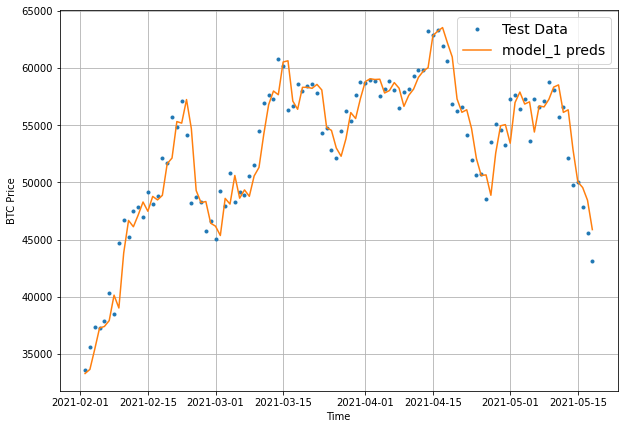

In [ ]:
# Let's plot our model 1 predictions
offset = 450
plt.figure(figsize = (10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps = X_test[-len(test_windows):], 
                 values = test_labels[:, 0], 
                 start = offset, 
                 label = "Test Data")
plot_time_series(timesteps = X_test[-len(test_windows):], 
                 values = model_1_preds, 
                 start = offset,
                 format = '-',
                 label = "model_1 preds")

## Model 1: Dense model (window = 30, horizon = 1)

Our first deep model is going to be a simple dense model:
* A single dense layer with 128 hidden units and ReLu
* An output layer with linear activation (no activation)
* Adam optimizer and MAE loss function
* Batch size of 128 (previously we've used 32)
* 100 epochs


In [ ]:
HORIZON = 1 # predict one step at a time (one day of Bitcoin prices)
WINDOW_SIZE = 30 # use 30 timesteps in past

In [ ]:
# Make windows data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [ ]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows = full_windows,
                                                                                labels = full_labels,
                                                                                test_split = 0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [ ]:
train_windows[:3], train_labels[:3]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
         126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
         152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
         180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
         135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
         160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
         175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
         133.20333, 142.76333, 137.92333, 142.95166, 152.55183, 160.33883,
         164.31499, 177

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(HORIZON, activation = "linear")
], name = "model_2_dense")

# 2. Compile the model
model_2.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae", "mse"])

# 3. Fit the model
model_2.fit(x = train_windows,
            y = train_labels,
            epochs = 100,
            batch_size = 128,
            verbose = 1,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_2.name)])

Epoch 1/100
18/18 [==============================] - 1s 34ms/step - loss: 1097.0399 - mae: 1097.0399 - mse: 4741506.0000 - val_loss: 3900.2537 - val_mae: 3900.2537 - val_mse: 32752730.0000
Epoch 2/100
18/18 [==============================] - 0s 25ms/step - loss: 428.0732 - mae: 428.0732 - mse: 811548.2500 - val_loss: 1587.0745 - val_mae: 1587.0745 - val_mse: 6817661.5000
Epoch 3/100
18/18 [==============================] - 0s 28ms/step - loss: 279.7655 - mae: 279.7655 - mse: 363083.0625 - val_loss: 1220.6888 - val_mae: 1220.6888 - val_mse: 4447002.0000
Epoch 4/100
18/18 [==============================] - 0s 25ms/step - loss: 224.3637 - mae: 224.3637 - mse: 225072.2188 - val_loss: 1160.1572 - val_mae: 1160.1572 - val_mse: 3837504.2500
Epoch 5/100
18/18 [==============================] - 0s 26ms/step - loss: 187.9681 - mae: 187.9681 - mse: 173777.0312 - val_loss: 1007.6487 - val_mae: 1007.6487 - val_mse: 3224229.0000
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss

In [ ]:
# Evaluate model 2 on test data
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 659.3332 - mae: 659.3332 - mse: 1397247.7500


[659.3331909179688, 659.3331909179688, 1397247.75]

In [ ]:
# Load in the best performing model
model_2 = tf.keras.models.load_model("/content/model_experiments/model_2_dense")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 605.8741 - mae: 605.8741 - mse: 1273360.7500


[605.8740844726562, 605.8740844726562, 1273360.75]

In [ ]:
model_2_preds = make_preds(model_2,
                           input_data = test_windows)

18/18 [==============================] - 0s 1ms/step


In [ ]:
# Evaluate results for model 2 predictions
model_2_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                y_pred = model_2_preds)
model_2_results

{'mae': 605.8741,
 'mse': 1273360.8,
 'rmse': 1128.4329,
 'mape': 2.726445,
 'mase': 1.0590738}

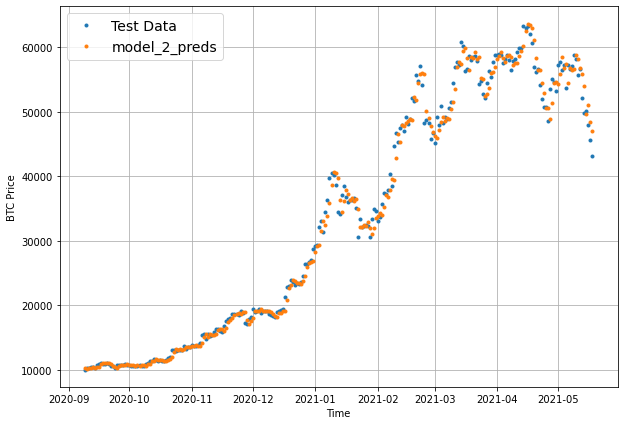

In [ ]:
# Plot the model_2 preds
offset = 300
plt.figure(figsize = (10, 7))
# Account for test_window offset when plotting
plot_time_series(timesteps = X_test[-len(test_windows):], values = test_labels[:, 0], start = offset, label = "Test Data")
plot_time_series(timesteps = X_test[-len(test_windows):], values = model_2_preds, start = offset, label = "model_2_preds")

## Model 3: Dense (window = 30, horizon = 7)

In [ ]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows = full_windows,
                                                                                labels = full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [ ]:
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(HORIZON, activation = "linear")
], name = "model_3_dense")

# Compile the model
model_3.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae", "mse"])

# Fit the model
model_3.fit(train_windows,
            train_labels,
            batch_size = 128,
            epochs = 100,
            verbose = 0,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_3.name)])

In [ ]:
# Evaluate the model on the test data
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1300.1525 - mae: 1300.1525 - mse: 5599956.5000


[1300.1524658203125, 1300.1524658203125, 5599956.5]

In [ ]:
# Load in and evaluate best version of model_3
model_3 = tf.keras.models.load_model("/content/model_experiments/model_3_dense")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1237.5065 - mae: 1237.5065 - mse: 5405199.0000


[1237.5064697265625, 1237.5064697265625, 5405199.0]

In [ ]:
# make predictions with model_3
model_3_preds = make_preds(model_3,
                           input_data = test_windows)
model_3_preds[:5]

18/18 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9004.694 , 9048.1   , 9425.09  , 9258.256 , 9495.797 , 9558.453 ,
        9357.3545],
       [8735.506 , 8840.303 , 9247.793 , 8885.601 , 9097.186 , 9174.327 ,
        9156.818 ],
       [8672.508 , 8782.387 , 9123.857 , 8770.371 , 9007.13  , 9003.869 ,
        9042.725 ],
       [8874.399 , 8784.74  , 9043.902 , 8943.052 , 9033.477 , 9176.489 ,
        9039.677 ],
       [8825.89  , 8777.44  , 8926.78  , 8870.179 , 9213.232 , 9268.156 ,
        8942.487 ]], dtype=float32)>

In [ ]:
# Evaluate model_3 results
model_3_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_3_preds)
model_3_results

{'mae': array([ 513.6056  ,  355.08328 ,  327.17075 ,  358.5106  ,  420.53293 ,
         537.854   ,  545.66156 ,  485.9228  ,  584.49713 ,  687.3824  ,
         836.2264  ,  755.1576  ,  731.4958  ,  775.3399  ,  567.95544 ,
         266.80865 ,  188.80225 ,  188.10805 ,  253.095   ,  301.43256 ,
         151.10721 ,  196.8148  ,  191.46178 ,  231.65031 ,  143.61125 ,
         122.59089 ,  132.78871 ,  190.81174 ,  179.15994 ,  228.26004 ,
         314.44022 ,  379.09235 ,  278.32526 ,  295.34702 ,  299.3852  ,
         248.64983 ,  299.75668 ,  259.69434 ,  180.30531 ,  206.72922 ,
         374.62863 ,  144.85086 ,  142.33635 ,  131.11613 ,   93.941124,
          54.825542,   73.79548 ,  103.60121 ,  121.333916,  168.67278 ,
         183.90945 ,  152.25307 ,  186.57191 ,  146.91273 ,  240.42912 ,
         351.00656 ,  540.952   ,  549.1573  ,  521.2411  ,  526.8554  ,
         453.36237 ,  257.98123 ,  277.2947  ,  301.8247  ,  455.718   ,
         458.9603  ,  503.4438  ,  522.3119 

## Make our evaluation function work for larger horizons

In [ ]:
# Create a function to take in model predictions and truth values and return evaluation metrics
def evaluate_preds(y_true, y_pred):
  # Make sure float32 datatype (for metric calculation)
  y_true = tf.cast(y_true, dtype = tf.float32)
  y_pred = tf.cast(y_pred, dtype = tf.float32)

  # Calculate various evaluation metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizon, we want to reduce metric to a single value)
  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
model_3_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_3_preds)
model_3_results

{'mae': 1237.5065,
 'mse': 5405198.5,
 'rmse': 1425.7478,
 'mape': 5.558879,
 'mase': 2.2020733}

We've made and evaluated predictions with `model_3`, let's visualize, visualize, visualzie!

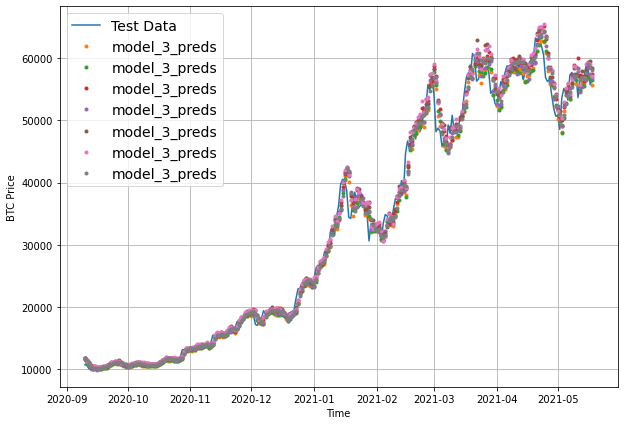

In [ ]:
# Plot the model_2 preds
offset = 300
plt.figure(figsize = (10, 7))
# Account for test_window offset when plotting
plot_time_series(timesteps = X_test[-len(test_windows):], values = test_labels[:, 0], start = offset,  format = "-",label = "Test Data")
plot_time_series(timesteps = X_test[-len(test_windows):], values = model_3_preds[:, ], start = offset, format = ".",label = "model_3_preds")

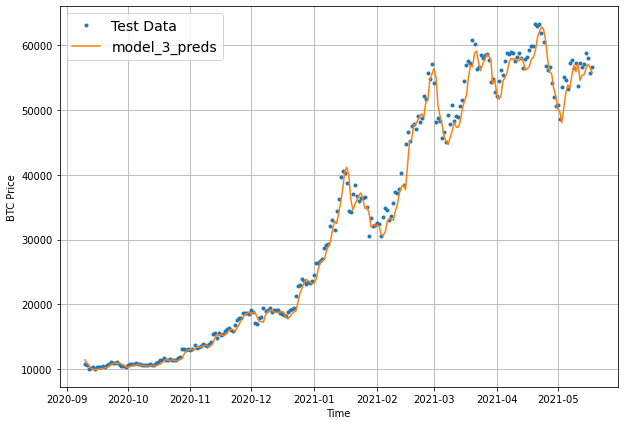

In [ ]:
# Plot the model_2 preds
offset = 300
plt.figure(figsize = (10, 7))
# Account for test_window offset when plotting
plot_time_series(timesteps = X_test[-len(test_windows):], 
                 values = test_labels[:, 0], 
                 start = offset,  
                 format = ".",
                 label = "Test Data")
plot_time_series(timesteps = X_test[-len(test_windows):],
                 values = tf.reduce_min(model_3_preds, axis = 1), 
                 start = offset, 
                 format = "-",
                 label = "model_3_preds")

## Which of our models is performing the best so far?

So we've trained a few models, now let's compare them and see how they've been...

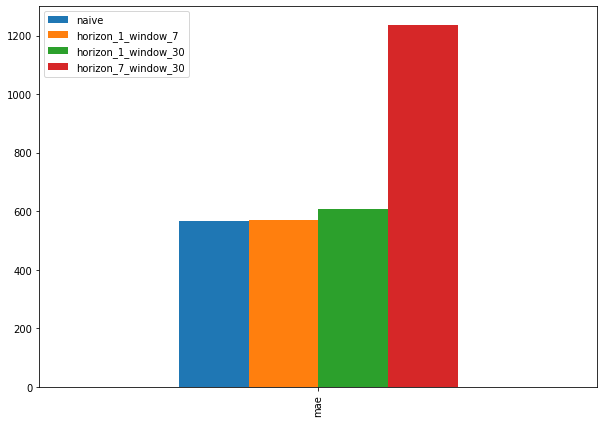

In [ ]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index = ["mae"]).plot(figsize = (10, 7), kind = "bar")

## Model 4: Conv1D



In [ ]:
HORIZON = 1 # Predict next day of Bitcoin prices
WINDOW_SIZE = 7 # use previous week worth data

In [ ]:
# Create windowed data
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2224, 2224, 556, 556)

We need an input shape of: `(btach_size, timesteps, input_dim)`...

However, our data isn't in that shape yet...

In [ ]:
# Check data input shape
train_windows[0].shape # return (WINDOW_SIZE,)

(7,)

In [ ]:
# Before we pass our data to the Conv1D layer we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [ ]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis = 1)) # add an extra dimension for input dim

In [ ]:
# Test out our lambda layer
print(f"Original shape: {x.shape}") # (WINDOW_SIZE
print(f"Expanded shape: {expand_dims_layer(x).shape}")
print(f"original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [ ]:
from tensorflow.keras import layers
tf.random.set_seed(42)
# Create Conv1D

model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis = 1)),
    layers.Conv1D(128, kernel_size = 5, padding = "causal", activation = "relu"),
    layers.Dense(HORIZON)
], name = "model_4_Conv1D")

# Compile model
model_4.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam())

# Fit
model_4.fit(train_windows,
            train_labels,
            epochs = 100,
            batch_size = 128,
            verbose = 0,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_4.name)])

In [ ]:
model_4.summary()

Model: "model_4_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Evaluate model
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 610.1541


610.154052734375

In [ ]:
# Loaad back in Conv1D model and re-evaluate
model_4 = tf.keras.models.load_model("/content/model_experiments/model_4_Conv1D")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 570.8284


570.828369140625

In [ ]:
# Make predictions on the test set
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8851.464, 8754.47 , 8983.927, 8759.671, 8703.627, 8708.294,
       8661.667, 8494.839, 8435.316, 8492.114], dtype=float32)>

In [ ]:
# Evaluate predictiobs
model_4_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_4_preds)
model_4_results

{'mae': 570.8284,
 'mse': 1176671.2,
 'rmse': 1084.7448,
 'mape': 2.5593357,
 'mase': 1.0027875}

## Model 5: RNN (LSTM)

Let's build an RNN model for our time series.

We'll use the same data we created previously.

In [ ]:
tf.random.set_seed(42)

# Let's build an LSTM model with the Functional API
# Create the model
inputs = layers.Input(shape = WINDOW_SIZE)
x = layers.Lambda(lambda x: tf.expand_dims(x, axis = 1))(inputs)
# x = layers.LSTM(128, return_sequences = True)(x)
x = layers.LSTM(128, activation = "relu")(x)
# x = layers.Dense(32, activation = "relu")(x)
outputs = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs = inputs, outputs = outputs, name = "model_5_LSTM")

# Compile the model
model_5.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam())

# Fit the model
model_5.fit(train_windows,
            train_labels,
            batch_size = 128,
            epochs = 100,
            verbose = 1,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_5.name)])

Epoch 1/100
18/18 [==============================] - 3s 107ms/step - loss: 2323.6082 - val_loss: 9222.6523
Epoch 2/100
18/18 [==============================] - 2s 113ms/step - loss: 695.4739 - val_loss: 1486.0555
Epoch 3/100
18/18 [==============================] - 2s 99ms/step - loss: 237.3967 - val_loss: 1298.9084
Epoch 4/100
18/18 [==============================] - 2s 97ms/step - loss: 181.9180 - val_loss: 966.6431
Epoch 5/100
18/18 [==============================] - 0s 6ms/step - loss: 173.4022 - val_loss: 970.9295
Epoch 6/100
18/18 [==============================] - 2s 98ms/step - loss: 173.5414 - val_loss: 941.4746
Epoch 7/100
18/18 [==============================] - 2s 96ms/step - loss: 170.3566 - val_loss: 898.5215
Epoch 8/100
18/18 [==============================] - 0s 6ms/step - loss: 157.6712 - val_loss: 914.8642
Epoch 9/100
18/18 [==============================] - 0s 7ms/step - loss: 166.5143 - val_loss: 1079.0776
Epoch 10/100
18/18 [==============================] - 2s 117

In [ ]:
# Load in best version of model 5 and evaluate on the test data
model_5 = tf.keras.models.load_model("/content/model_experiments/model_5_LSTM")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 594.6030


594.6029663085938

In [ ]:
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:5]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8978.46 , 8810.951, 8997.779, 8836.308, 8731.047], dtype=float32)>

In [ ]:
# Evaluate model 5 predictions
model_5_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_5_preds)
model_5_results

{'mae': 594.60297,
 'mse': 1267231.9,
 'rmse': 1125.7139,
 'mape': 2.6717565,
 'mase': 1.0445527}

>🔑 Note: Because neural networks are such powerful algorithms, they can be used for almost any problem, however, that doesn't mean they'll achieve performant or usable results. You're probably starting to clue onto this now.

## Make a multivariate time series dataset

Before we add a feature to our time-series, what is a feature we can use?

One feature we could add is whether or not Daniel Bourke tweeted or not?

* day 1 - 0
* day 2 - 1
* day 3 - 0

What's a better feature to use?

How about the Bitcoing halving events?

https://www.cmcmarkets.com/en/learn-cryptocurrencies/bitcoin-halving

In [ ]:
# Let's make a multivariate dataset
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
# Let's add the bitcoin halving events yo our dataset
block_reward_1 = 50 # 3 January 2009 - this block reward isn't in our dataset
block_reward_2 = 25 # 28 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 18 May 2020

# Block reward dates
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [ ]:
block_reward_2_datetime

numpy.datetime64('2012-11-28')

In [ ]:
# Create date ranges of where specific block_reward values should be
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2421)

In [ ]:
# Add in a block reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Add in block_reward values as a feature to our dataframe
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days: block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days: , -1] = block_reward_4

In [ ]:
bitcoin_prices_block.iloc[1100:1115]

,Price,block_reward
Date,,
2016-10-05,608.12500,12.5
2016-10-06,610.57000,12.5
2016-10-07,610.23375,12.5
2016-10-08,617.44500,12.5
2016-10-09,614.59625,12.5
2016-10-10,615.91625,12.5
2016-10-11,618.32750,12.5
2016-10-12,637.21624,12.5
2016-10-13,637.73625,12.5


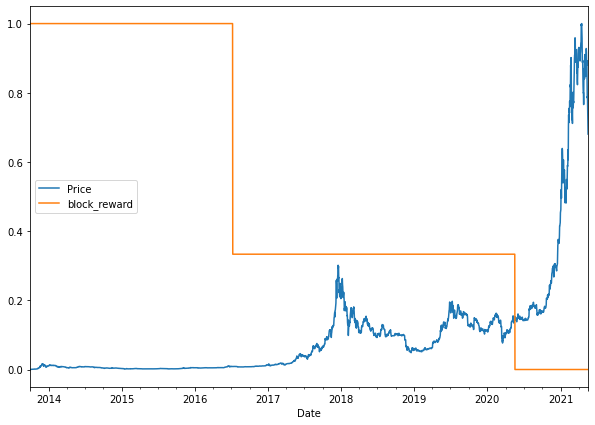

In [ ]:
# Plot the block reward vs price over time
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]),
                                     columns = bitcoin_prices_block.columns,
                                     index = bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize = (10, 7))

## Making a windowed dataset with pandas

Previously, we've turned our univariate time series into windowed dataset, using the helper functions above.

However, since we've got multivariate data, these functions won't work.

No t to worry, we can use pandas.DataFrame.shift() method to window our multivariate data.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html



In [ ]:
# Setup our dataset hyperparamerts
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Make a copy of Bitcoin historical data with block reaward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Price + {i+1}"] = bitcoin_prices_windowed["Price"].shift(periods = i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price + 1,Price + 2,Price + 3,Price + 4,Price + 5,Price + 6,Price + 7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


What we've done is created a way to window our dataset directly from pandas dataframe.

```
[0, 1, 2, 3, 4, 5, 6, block_rewars] -> [7]
[1, 2, 3, 4, 5, 6, 7, block_rewars] -> [8]
[2, 3, 4, 5, 6, 7, 8, block_reward] -> [9]
```

In [ ]:
# Create X (windows) and y (horizons) features
X = bitcoin_prices_windowed.dropna().drop("Price", axis = 1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price + 1,Price + 2,Price + 3,Price + 4,Price + 5,Price + 6,Price + 7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [ ]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [ ]:
# Make train and test sets using indexing
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

## Model 6: Dense (multivariate time series)

In [ ]:
tf.random.set_seed(42)
model_6 = tf.keras.Sequential([
    layers.Dense(128, activation = "relu"),
    layers.Dense(HORIZON)
], name = "model_6_dense_multivariate")

# Compile
model_6.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam())

# Fit
model_6.fit(X_train, y_train,
            epochs = 100,
            batch_size = 128,
            verbose = 1,
            validation_data = (X_test, y_test),
            callbacks = [create_model_checkpoint(model_name = model_6.name)])

Epoch 1/100
18/18 [==============================] - 1s 30ms/step - loss: 1234.6804 - val_loss: 2061.9077
Epoch 2/100
18/18 [==============================] - 0s 24ms/step - loss: 351.5053 - val_loss: 1908.6733
Epoch 3/100
18/18 [==============================] - 0s 25ms/step - loss: 235.4153 - val_loss: 1329.0585
Epoch 4/100
18/18 [==============================] - 0s 26ms/step - loss: 208.6112 - val_loss: 1102.1342
Epoch 5/100
18/18 [==============================] - 0s 3ms/step - loss: 196.5770 - val_loss: 1107.8474
Epoch 6/100
18/18 [==============================] - 0s 23ms/step - loss: 187.2245 - val_loss: 1036.1720
Epoch 7/100
18/18 [==============================] - 0s 25ms/step - loss: 182.0245 - val_loss: 1019.2928
Epoch 8/100
18/18 [==============================] - 0s 24ms/step - loss: 175.7059 - val_loss: 977.8488
Epoch 9/100
18/18 [==============================] - 0s 24ms/step - loss: 170.1784 - val_loss: 954.4037
Epoch 10/100
18/18 [==============================] - 0s 

In [ ]:
# Evaluate multivariate model
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 626.7440


626.7440185546875

In [ ]:
# Load in and evaluate best performing model
model_6 = tf.keras.models.load_model("/content/model_experiments/model_6_dense_multivariate")
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 567.8899


567.889892578125

In [ ]:
# Make predictions with multivariate model
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

18/18 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8844.684, 8769.905, 9045.17 , 8747.686, 8728.429, 8772.757,
       8667.292, 8503.437, 8470.313, 8527.244], dtype=float32)>

In [ ]:
# Evaluate predictions to get eval metrics
model_6_results = evaluate_preds(y_true = y_test,
                                 y_pred = model_6_preds)
model_6_results

{'mae': 567.8899,
 'mse': 1164816.4,
 'rmse': 1079.2666,
 'mape': 2.5460758,
 'mase': 0.99762523}

## Model 7: N-BEATS algorithm

Let's now try build the biggest baddest (though maybe not the baddest, as in, it perform really well...) time series forecasting model we've built so far.

More specifically, we're going to be replicating the slgorithm in Figure 1 from the following paper: https://arxiv.org/abs/1905.10437

Why?

* This will allow us to practice replicating a paper with TensorFlow code
* We will see how to use TensorFlow layer subclassing (to make our own custom layers)
* Get expirience using the Functional API to create a custom architecture
* Potentially get state of the art results on our problem

### Building and testing the N-BEATS block layer

Because the N-BEATS block layer doen't exist in TensorFlow, we have to create it.

To create custom layers and models in TensorFlow we cab use subclassing: https://www.tensorflow.org/guide/keras/custom_layers_and_models

In [ ]:
# Create NBeatBlock custom layer
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the kwargs argument takes care of all the arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers, each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation = "relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation = "linear", name = "theta")

  def call(self, inputs):
   x = inputs
   for layer in self.hidden:
      x = layer(x)
   theta = self.theta_layer(x)
   # Output the backcast and the forecst
   backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
   return backcast, forecast

Let's test out NBeatsBlock class.

To do so we'll make some dummy inputs and outputs.

In [ ]:
# Set up dummy NBatsBlock layer to represent inputs and outputs
tf.random.set_seed(42)
dummy_nbeats_block_layer = NBeatsBlock(input_size = WINDOW_SIZE,
                                       theta_size = WINDOW_SIZE+HORIZON, #backcast + forecast
                                       horizon = HORIZON,
                                       n_neurons = 128,
                                       n_layers = 4)

In [ ]:
# Crerate dummy inputs (have to be same size as inpust_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis = 0) # input shape to the model has to reflect dense layer input requirements
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
# Pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 0.07960171  0.32512033 -0.8428683  -0.6938985  -0.31720552 -0.5698734
 -0.6396662 ]
Forecast: 1.0071648359298706


### Preparing data for the N-BEATS algorithm using `tf.data`

To make our input data load as fast as possible, we're going to be adhering to the performant data pipeline steps in the tf.data guide: https://www.tensorflow.org/guide/data_performance

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Create N-BEATS data inputs (N-BEATS works with univariate time series)
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
# Add windowed column
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods = i+1)
bitcoin_prices_nbeats.head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis = 1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make train and test datasets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [ ]:
# Time to make our dataset performant using the tf.data API
train_feature_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_feature_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Combine labels and features by zipping together -> (features, labels)
train_dataset = tf.data.Dataset.zip((train_feature_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_feature_dataset, test_labels_dataset))

# Batch and prefecth
BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

### Setting up hyperparameters for N-BEATS algorithm

The N-BEATS algorithm has a fair few number of parameters, many of them can be found in Table 18: https://arxiv.org/pdf/1905.10437.pdf

In [ ]:
# Values from N-BEATS paper
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

### Getting ready for residual connections

Before we can craft our N-BEATS model, we need two layers for the residual connections (subtract and add).

The N-BEATS algorithm uses double residual stacking to help train its deeper architecture (section 3.2 of N-BEATS paper).

For more on residual connections see: https://en.wikipedia.org/wiki/Residual_neural_network

And here: https://paperswithcode.com/method/resnet


In [ ]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)
tensor_1, tensor_2

# Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

# Get outputs
print(f"Input tonsors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tonsors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


## Building, compiling and fitting the N-BEATS algorithm

1. Setup an instance of the N-BEATS block layer using `NBeatsBlock` (this'll be the initial block used for the network, the rest will be created as part of stacks).
2. Create an input layer for N-BEATS stack (we'll use the Keras Functional API).
3. Make the initial backcast and forecsats for the model with the layer created in (1)
4. Use for loop to create stacks of block layers.
5. Use the `NBeatsBlock` class within the for loop (4) to create blocks which return backcasts and block-level forecasts.
6. Create the double redisudal stacking using subtract and add layers.
7. Put the model inputs and outputs together using `tf.keras.Model()`.
8. Compile the model with MAE loss (the paper uses multiple losses but we'll use MAE to keep it inline with pur other models) and Adam optimizer with default setting as per secton 5.2 of N-BEATS paper
9. Fit the N-BEATS for 5000 epochs, and since it's fitting for so many epochs, we'll use a couple of callbacks:
  * Early Stopping - because the model will be training for so long, we'll stop it early if it stops improving.
  * Reduce LR on Plateau - if a model stops improving, try lowering the learning to reduce the amount it updates its weights each time (take smaller steps towards best performance).

In [ ]:
%%time

tf.random.set_seed(42)

# 1. Set an instance of NBeatsBlock layer
nbeats_block_layer = NBeatsBlock(input_size = INPUT_SIZE,
                                 theta_size = THETA_SIZE,
                                 horizon = HORIZON,
                                 n_neurons = N_NEURONS,
                                 n_layers = N_LAYERS,
                                 name = "InitialBlock")

# 2. Create input to stack
stack_input = layers.Input(shape = (INPUT_SIZE), name = "stack_input")

# 3. Create initial backcast and forecast input (backwards prediciton + horizon prediction)
residuals, forecast = nbeats_block_layer(stack_input)

# 4. Create stacks of block layers
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already created in (3)

  # 5. Use the NBeatsBlock to calculate the backcast as well as the forecast
  backcast, block_forecast = NBeatsBlock(
      input_size = INPUT_SIZE,
      theta_size = THETA_SIZE,
      horizon = HORIZON,
      n_neurons = N_NEURONS,
      n_layers = N_LAYERS,
      name = f"NbeatsBlock_{i}"
  )(residuals) # pass in the residuals

  # 6 Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name = f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name = f"add_{i}")

# 7 Put the stack model together
model_7 = tf.keras.Model(inputs = stack_input, outputs = forecast, name = "model_7_NBEATS")

# 8. Compile model with MAE loss
model_7.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam())

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callback
model_7.fit(train_dataset,
            epochs = N_EPOCHS,
            validation_data = test_dataset,
            verbose = 0,
            callbacks = [tf.keras.callbacks.EarlyStopping(monitor = "val_loss",
                                                          patience = 200,
                                                          restore_best_weights = True),
                         tf.keras.callbacks.ReduceLROnPlateau(monitor = "val_loss",
                                                             patience = 100,
                                                             verbose = 1)])


Epoch 758: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 1164: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 1264: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
CPU times: user 3min 30s, sys: 7.52 s, total: 3min 37s
Wall time: 3min 53s


In [ ]:
# Evaluate N-BEATS model on the test dataset
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 28ms/step - loss: 573.9022


573.9022216796875

In [ ]:
# Make predictions
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

1/1 [==============================] - 1s 1s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8840.912, 8779.251, 9025.28 , 8749.358, 8757.549, 8750.848,
       8648.553, 8497.423, 8478.642, 8507.545], dtype=float32)>

In [ ]:
model_7_results = evaluate_preds(y_true = y_test,
                                 y_pred = model_7_preds)
model_7_results

{'mae': 573.9022,
 'mse': 1164274.6,
 'rmse': 1079.0155,
 'mape': 2.584141,
 'mase': 1.0081873}

In [ ]:
model_1_results

{'mae': 568.9511,
 'mse': 1171743.8,
 'rmse': 1082.4711,
 'mape': 2.5448983,
 'mase': 0.99948955}

Woah... even with all of those special layers and hand-crafted network, it looks like the N-BEATS model doesn't perform as well as `model_1` or the original naive forecast.

This goes to show the power of smaller networks as well as the fact not all larger models are better suited for a certain type of data.

### Plotting the N-BEATS architecture we've created

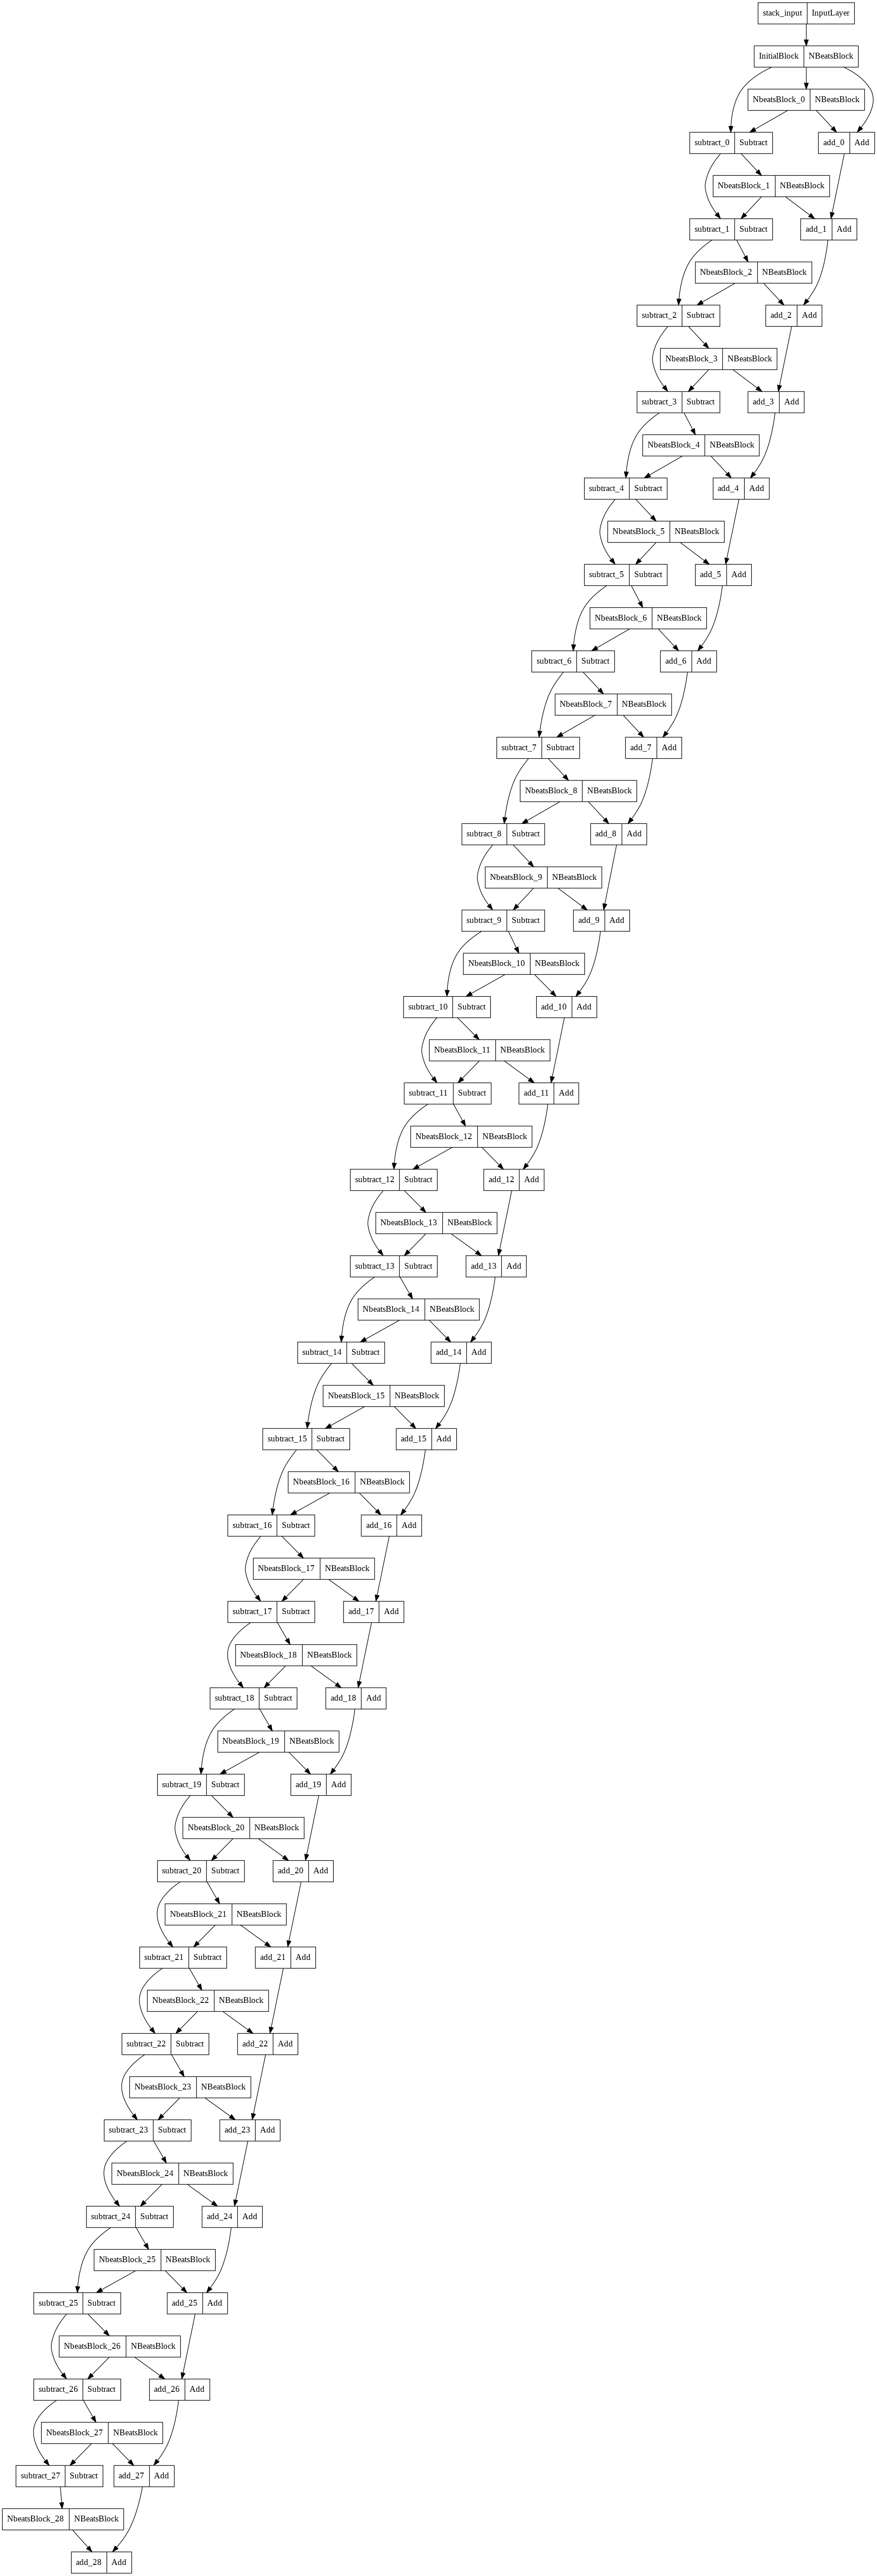

In [ ]:
# Plot the N-BEATS model and inspect the architecture
from tensorflow.keras.utils import plot_model
plot_model(model_7)

## Model 8: Creating an ensemble (stacking different models together)

An ensemble leverages the wisdom of the crowd effect.

It combines many *different* models to predict a common goal.

In [ ]:
HORIZON, WINDOW_SIZE

(1, 7)

### Constructing and fitting an ensemble of models (using different loss functions)

In [ ]:
def get_enesemble_models(horizon = HORIZON,
                         train_data = train_dataset,
                         test_data = test_dataset,
                         num_iter = 10,
                         num_epochs = 1000,
                         loss_fns = ["mae", "mse", "mape"]):
  """
  Returns a lost of num_iter models each trained on MAE, MSE and MAPE loss.

  For example, if num-iter = 10, a list of 30 trained models will be returned:
  10 * len(["mae", "mse", "mape"])
  """
  # Make empty lost for trained ensemble models
  ensemble_models = []

  # Create num iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model bt reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
          # Initialize dense layers with normal distribution for estimating prediction intervals later on
          layers.Dense(128, kernel_initializer = "he_normal",activation = "relu"),
          layers.Dense(128, kernel_initializer = "he_normal",activation = "relu"),
          layers.Dense(HORIZON)
      ])

      # Compile simple model with current loss function
      model.compile(loss = loss_function,
                    optimizer = tf.keras.optimizers.Adam(),
                    metrics = ["mae", "mse"])
      
      # Fit the current model
      model.fit(train_data,
                epochs = num_epochs,
                verbose = 0,
                validation_data = test_data,
                callbacks = [tf.keras.callbacks.EarlyStopping(monitor = "val_loss",
                                                              patience = 200,
                                                              restore_best_weights = True),
                             tf.keras.callbacks.ReduceLROnPlateau(monitor = "val_loss",
                                                                  patience = 100,
                                                                  verbose = 1)])
      
      # Append fitted model to list of ensemble models
      ensemble_models.append(model)

  return ensemble_models

In [ ]:
%%time
# Get list of trained ensemble models
ensemble_models = get_enesemble_models(num_iter = 5,
                                      num_epochs = 1000)

Optimizing model bt reducing: mae for 1000 epochs, model number: 0

Epoch 768: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 908: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model bt reducing: mse for 1000 epochs, model number: 0

Epoch 594: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 710: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 810: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model bt reducing: mape for 1000 epochs, model number: 0

Epoch 168: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 268: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model bt reducing: mae for 1000 epochs, model number: 1
Optimizing model bt reducing: mse for 1000 epochs, model number: 1

Epoch 412: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 512: ReduceLROnPl

In [ ]:
len(ensemble_models)

15

In [ ]:
ensemble_models

## Make predictions with our ensemle model

In [ ]:
# Create a function which uses a list of trained models to make and return a list of predictions
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [ ]:
%%time
ensemble_preds = make_ensemble_preds(ensemble_models = ensemble_models,
                                     data = test_dataset)

1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 54ms/step
CPU times: user 791 ms, sys: 24.5 ms, total: 816 ms
Wall time: 988 ms


In [ ]:
ensemble_preds

<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8805.729 ,  8776.993 ,  9025.376 , ..., 50157.92  , 49118.586 ,
        46565.92  ],
       [ 8767.328 ,  8742.696 ,  9052.6   , ..., 49339.703 , 48535.668 ,
        45338.977 ],
       [ 8745.424 ,  8733.034 ,  9101.386 , ..., 49267.164 , 47660.426 ,
        45370.047 ],
       ...,
       [ 8947.22  ,  8777.723 ,  9051.06  , ..., 49527.32  , 49337.18  ,
        46463.508 ],
       [ 8724.473 ,  8801.502 ,  9099.174 , ..., 49565.266 , 48503.01  ,
        45027.6   ],
       [ 8817.503 ,  8762.021 ,  9041.3545, ..., 49726.348 , 48060.637 ,
        45835.07  ]], dtype=float32)>

In [ ]:
# Evaluate ensemble model predictions
ensemble_results = evaluate_preds(y_true = y_test,
                                  y_pred = ensemble_preds)
ensemble_results

{'mae': 579.49524,
 'mse': 1181519.5,
 'rmse': 1086.7924,
 'mape': 2.653657,
 'mase': 1.0180125}

Our ensemble preds come out in multiple dimensions but to combine into point predictions we can leverage the mean of all of the predictions or the median - https://machinelearningmastery.com/combine-predictions-for-ensemble-learning/

In [ ]:
ensemble_mean = tf.reduce_mean(ensemble_preds, axis = 0)
ensemble_mean[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8789.001, 8773.324, 9058.708, 8730.271, 8736.855, 8702.723,
       8668.07 , 8475.95 , 8448.176, 8524.168], dtype=float32)>

In [ ]:
import numpy as np
emsemble_median = np.median(ensemble_preds, axis = 0)
emsemble_median[:10]

array([8785.187, 8776.459, 9051.06 , 8719.779, 8737.602, 8711.597,
       8657.142, 8478.887, 8453.517, 8523.439], dtype=float32)

In [ ]:
# Evaluate ensemble model predictions
ensemble_results = evaluate_preds(y_true = y_test,
                                  y_pred = ensemble_mean)
ensemble_results

{'mae': 567.23315,
 'mse': 1144271.0,
 'rmse': 1069.706,
 'mape': 2.580318,
 'mase': 0.9964715}

In [ ]:
# Evaluate ensemble model predictions
ensemble_results = evaluate_preds(y_true = y_test,
                                  y_pred = emsemble_median)
ensemble_results

{'mae': 565.50464,
 'mse': 1141798.1,
 'rmse': 1068.5496,
 'mape': 2.571716,
 'mase': 0.993435}

### Plotting the prediction intervals (uncertainty estimates) of our ensemble

So far, we've been making point prediction with our models.

E.g. horizon = 1, our model predicts tomorrow's proce of Bitcoin wil be $50,000 USD.

Wouldn't it be helpful if we knew a range of where that prediction came from?

Instrad of 50,000 USD on the dot, how about 40,000 to 52,000 USD?

To get the 95% confidence prediction intervals for a deep learning model is the bootstrap method:
1. Take the predictions from a number of randomly initialized models (we've got this thanks to our ensemble models).
2. Measure the standard deviation of the predictions.
3. Multiply the standard deviation by 1.96 (assuming the distribution is Gaussian/Normal, 95% of observation fall within 1.96 standard deviations of the mean).
4. To get the prediction interval upper and lower bounds, add and subtract the value obtained in (3) to the mean/median of the predictions made in (1)

* https://en.wikipedia.org/wiki/1.96
* https://eng.uber.com/neural-networks-uncertainty-estimation/


In [ ]:
# Find the upper and lower bounds of ensemmble predictions
def get_upper_lower(preds): # 1. Take the predictions from a number of randomly initialized model

  # 2. Measure the standard deviation of the predictions
  std = tf.math.reduce_std(preds, axis = 0)

  # 3. Multiply the standard deviation by 1.96
  interval = std * 1.96

  # 4 Get the prediction interval upper and lower bounds 
  preds_mean = tf.reduce_mean(preds, axis = 0)
  lower, upper = preds_mean - interval, preds_mean + interval

  return lower, upper

In [ ]:
# Get the upper and lower bounds of the 95% prediction interval
lower, upper = get_upper_lower(preds = ensemble_preds)
lower, upper

(<tf.Tensor: shape=(556,), dtype=float32, numpy=
 array([ 8686.653 ,  8730.787 ,  8999.006 ,  8633.589 ,  8648.52  ,
         8637.699 ,  8600.577 ,  8385.861 ,  8393.254 ,  8484.816 ,
         8133.732 ,  8045.0635,  7995.9795,  7553.199 ,  7189.32  ,
         7199.938 ,  6977.695 ,  7131.7686,  6989.864 ,  7462.412 ,
         7297.2007,  7676.7007,  7470.392 ,  7294.7036,  7237.7295,
         7256.572 ,  7145.6045,  7330.641 ,  7462.019 ,  7494.944 ,
         7470.7017,  7259.2104,  7175.314 ,  7143.9136,  7146.276 ,
         7174.1606,  7013.7725,  7050.9453,  6797.446 ,  6536.878 ,
         7274.207 ,  7079.8936,  7064.569 ,  7141.1904,  7103.146 ,
         7068.5483,  7162.645 ,  7173.4985,  7137.9414,  7162.2515,
         7267.681 ,  7340.4907,  7182.772 ,  7113.595 ,  7121.0645,
         6897.5205,  7219.8237,  7285.915 ,  7306.2295,  7605.237 ,
         7971.348 ,  8076.5576,  7782.587 ,  8007.9297,  8025.4385,
         8121.7363,  8005.997 ,  8670.233 ,  8802.817 ,  8690.705 ,

> 📖 Resource: Many of the steps we've taken above have inspired/referenced from the Machine Learning Mastery blog post on [Prediction Intervals for Deep Learning Neural Networks](https://machinelearningmastery.com/prediction-intervals-for-deep-learning-neural-networks/)

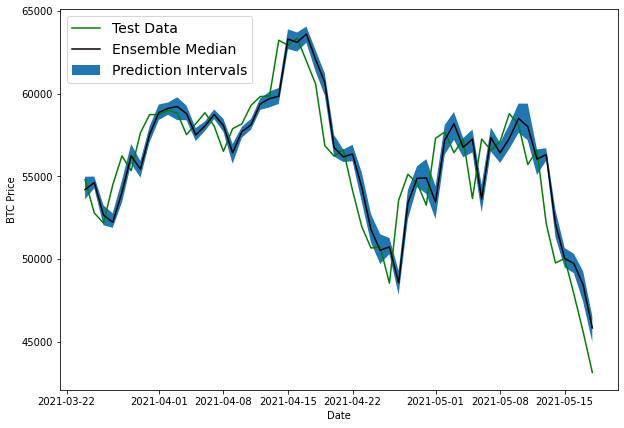

In [ ]:
# Get the median/mean values of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis = 0)

# Plot the median of our ensemble preds along with the prediction intervals (where the predictions fall between)
offset = 500
plt.figure(figsize = (10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label = "Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label = "Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
# To plot the upper and lower bounds, let's use fill_between: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label = "Prediction Intervals")
plt.legend(loc = "upper left", fontsize = 14)

Hmm...

So far all of our models predictions have been lagging behind the test data...

As if they're replicating what the naive model does and just predict the previous timestep as the next timestep.

> 🔑 **Note**: These prediction intervals are estimates themselves. And they have been created with the assumption that our model's data is from a normal distribution.

## Aside: two types of uncertainity (coconut and subway)

Uncertainty estimates in machine learning seek out to qualitatively and quantitively:
1. What can my model know? (with prefect data, what's possible for a model to learn?)
2. What doesn't my model know? (what can a model never preict? Or would it helpful if a model could tell you that when it's making a prediction, it doesn't actually know if it's right or not?)

There are two major types of uncertainty in machine learning you should know about:
* **Aleatoric uncertainity** - this type of uncertainty could not be reduced and it is oftem referred as "data" uncertainty or "subway" uncertainty.
* **Epistemic** - this type of uncertainty can be reduced, it also referred to as "model" or "coconut" uncertainty.

We've only scratched the surface of uncertainty in machine but if you'd like to learn more, I'd highly recommend checking out the resources located here: https://dev.mrdbourke.com/tensorflow-deep-learning/10_time_series_forecasting_in_tensorflow/#learning-more-on-uncertainty



## Model 9: Train a model on the full historical data to make predictions into the future

So far, all of our models have predicted on the test dataset, however, this is only a pseudofuture.

Let's now build a model which is capable of predicting into the future!

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
bitcoin_prices_windowed.tail()

,Price,block_reward,Price + 1,Price + 2,Price + 3,Price + 4,Price + 5,Price + 6,Price + 7
Date,,,,,,,,,
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679
2021-05-17,45604.615754,6.25,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426
2021-05-18,43144.471291,6.25,45604.615754,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651


In [ ]:
# Train model on entire data to make predictions on the next day
X_all = bitcoin_prices_windowed.dropna().drop(["Price", "block_reward"], axis = 1).to_numpy()
# Get labels
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

len(X_all), len(y_all)

(2780, 2780)

In [ ]:
X_all[:5], y_all[:5]

(array([[121.795  , 120.65533, 121.33866, 118.67466, 108.58483, 125.455  ,
         123.65499],
        [123.033  , 121.795  , 120.65533, 121.33866, 118.67466, 108.58483,
         125.455  ],
        [124.049  , 123.033  , 121.795  , 120.65533, 121.33866, 118.67466,
         108.58483],
        [125.96116, 124.049  , 123.033  , 121.795  , 120.65533, 121.33866,
         118.67466],
        [125.27966, 125.96116, 124.049  , 123.033  , 121.795  , 120.65533,
         121.33866]]),
 array([123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ]))

In [ ]:
# Turn data into efficient running tensors

feature_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# Combine features and labels
dataset_all = tf.data.Dataset.zip((feature_dataset_all, labels_dataset_all))

# Batch and prefetch for otpimal performance
BATCH_SIZE = 1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [ ]:
tf.random.set_seed(42)

# Create model (nice and simple, just to test)
model_9 = tf.keras.Sequential([
    layers.Dense(128, activation = "relu"),
    layers.Dense(128, activation = "relu"),
    layers.Dense(HORIZON)
], name = "model_9_future_model")

# Compile
model_9.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam())

# Fit
model_9.fit(dataset_all,
            epochs = 100,
            verbose = 1)

Epoch 1/100
3/3 [==============================] - 0s 7ms/step - loss: 4310.6460
Epoch 2/100
3/3 [==============================] - 0s 5ms/step - loss: 2286.0432
Epoch 3/100
3/3 [==============================] - 0s 5ms/step - loss: 455.6416
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 1394.4469
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: 1358.7922
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 600.7654
Epoch 7/100
3/3 [==============================] - 0s 5ms/step - loss: 584.5320
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: 817.2908
Epoch 9/100
3/3 [==============================] - 0s 5ms/step - loss: 534.2358
Epoch 10/100
3/3 [==============================] - 0s 6ms/step - loss: 394.9994
Epoch 11/100
3/3 [==============================] - 0s 5ms/step - loss: 524.4480
Epoch 12/100
3/3 [==============================] - 0s 5ms/step - loss: 370.9251
Epoch 13/100
3/3 [===============

### Make predictions into future

In [ ]:
# How many timesteps to predict into the future?
INTO_FUTURE = 14

To make predictions into the future we want a function which:
1. Takes as input:
  * a list of values (Bitcoin historical data)
  * a trained model (such as `model_9`)
  * a window into the future to predict our (our `INTO_FUTURE` variable)
  * the window size a model was trained on (`WINDOW_SIZE`) - the model can only predict on the same kind of data it was trained on.

2. Creates an empty list for future forecasts (this will be returned at the end of the end, when it's full of predictions) and extracts the last `WINDOW_SIZE` values from the input values.
3. Loop `INTO_FUTURE` times making a prediction on `WINDOW_SIZE` sequences which update to remove the first value and append the latest prediction.

In [ ]:
tf.expand_dims(y_all[-WINDOW_SIZE:], axis = 0)

<tf.Tensor: shape=(1, 7), dtype=float64, numpy=
array([[56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361, 43144.47129086]])>

In [ ]:
# 1. Create functions to make predictions into the future
def make_future_forecasts(values, model, into_future = INTO_FUTURE, window_size = WINDOW_SIZE) -> list:
  """
  Make future forecasts into_future steps after values ends.

  Returns future forecasts as a list of floats.
  """

  # 2. Create an empty list for future forecasts\prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:]

  # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each
  for _ in range(into_future):
    # Predict on the last window then append it again, again, again (out model will eventually start to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis = 0))
    print(f"Predicting on:\n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows))
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]

  return future_forecast

In [ ]:
# Make forecast into the future
future_forecasts = make_future_forecasts(values = y_all,
                                        model = model_9,
                                        into_future = INTO_FUTURE,
                                        window_size = WINDOW_SIZE)

1/1 [==============================] - 0s 25ms/step
Predicting on:
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 55764.47265625

1/1 [==============================] - 0s 38ms/step
Predicting on:
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55764.47265625] -> Prediction: 50985.9296875

1/1 [==============================] - 0s 36ms/step
Predicting on:
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55764.47265625 50985.9296875 ] -> Prediction: 48522.9609375

1/1 [==============================] - 0s 23ms/step
Predicting on:
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55764.47265625 50985.9296875  48522.9609375 ] -> Prediction: 48137.19921875

1/1 [==============================] - 0s 23ms/step
Predicting on:
 [47885.62525472 45604.61575361 43144.47129086 55764.47265625
 50985.9296875  48522.9609375  48137.19921875

### Plot future forecasts

In [ ]:
future_forecasts

[55764.473,
 50985.93,
 48522.96,
 48137.2,
 47880.633,
 46879.715,
 48227.594,
 53963.684,
 49685.543,
 47596.176,
 48114.418,
 48807.996,
 48623.85,
 50178.715]

In [ ]:
def get_future_dates(start_date, into_future, offset = 1):
  """
  Returns array of datetime values ranging from start_date to start_date + into_future
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date, "D" stands for day
  return np.arange(start_date, end_date, dtype = "datetime64[D]")

In [ ]:
# Last timestep of timesteps (currently np.datetime64 format)
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [ ]:
# Get next two weeks of timesteps
next_timesteps = get_future_dates(start_date = last_timestep,
                                  into_future = INTO_FUTURE,
                                  offset = 1)
next_timesteps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [ ]:
# Insert last timestep/final price into next time steps and future forecasts so the plot doesn't look janky
next_timesteps = np.insert(next_timesteps, 0, last_timestep)
future_forecasts = np.insert(future_forecasts, 0, btc_price[-1])
next_timesteps, future_forecasts

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 55764.473, 50985.93 , 48522.96 , 48137.2  , 47880.633,
        46879.715, 48227.594, 53963.684, 49685.543, 47596.176, 48114.418,
        48807.996, 48623.85 , 50178.715], dtype=float32))

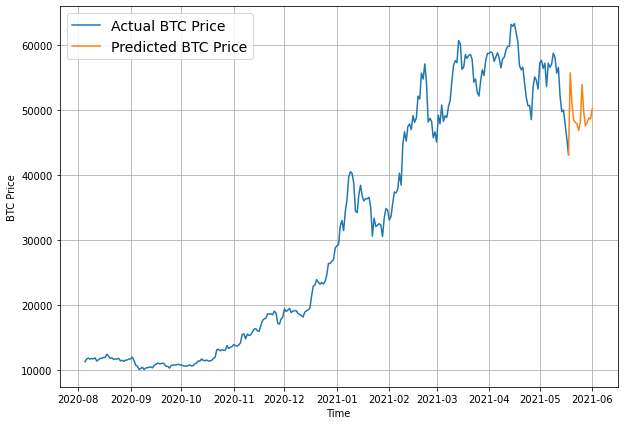

In [ ]:
# Plot future price predictions of Bitcoin
plt.figure(figsize = (10,7))
plot_time_series(bitcoin_prices.index, btc_price, start = 2500, format = "-", label = "Actual BTC Price")
plot_time_series(next_timesteps, future_forecasts, format = "-", label = "Predicted BTC Price")

## Model 10: Why forecasting is BS(the turkey problem 🦃)

In [ ]:
# Let's introduce a turkey prolbme to our BTC data (price of BTC falls 100x in one day)
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1] / 100

In [ ]:
# Manufacture an extra price on the end (to showcase our Turkey problem)
btc_price_turkey[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 431.44471290860304]

In [ ]:
# Get the timesteps for the turkey problem
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

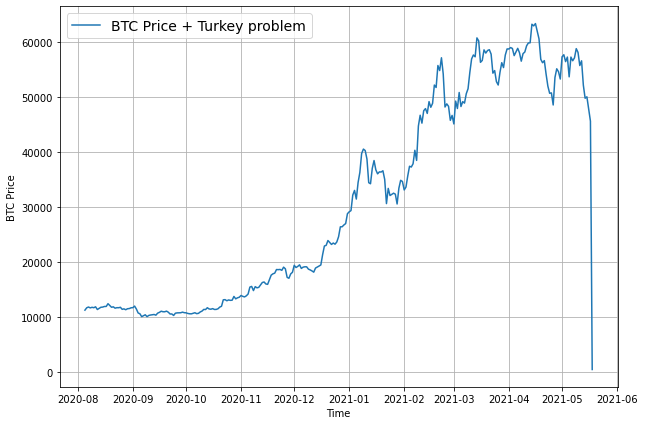

In [ ]:
plt.figure(figsize = (10, 7))
plot_time_series(timesteps = btc_timesteps_turkey,
                 values = btc_price_turkey,
                 format = "-",
                 label = "BTC Price + Turkey problem",
                 start = 2500)

In [ ]:
WINDOW_SIZE = 7
HORIZON = 1

In [ ]:
# Create train and test sets for turkey problem data
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size = WINDOW_SIZE, horizon = HORIZON)

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)
len(X_train), len(X_test), len(y_train), len(y_test)

(2224, 556, 2224, 556)

### Build a turkey model (model to predict on turkey)

In [ ]:
# Clone model 1 architecture for turkey model and fit turkey model in turkey data
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = "model_10_turkey_model"
turkey_model.compile(loss = "mae",
                     optimizer = tf.keras.optimizers.Adam())
turkey_model.fit(X_train, y_train,
                 epochs = 100,
                 verbose = 0,
                 batch_size = 128,
                 validation_data = (X_test, y_test),
                 callbacks = [create_model_checkpoint(turkey_model.name)])

In [ ]:
# Evaluate model on test data
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 3ms/step - loss: 784.3420


784.342041015625

In [ ]:
# Load best performing turkey model and evaluate on test data
turkey_model = tf.keras.models.load_model("/content/model_experiments/model_10_turkey_model")
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 3ms/step - loss: 639.2443


639.2443237304688

In [ ]:
# Make predictions with turkey model
turkey_preds = make_preds(turkey_model, X_test)
turkey_preds[:10]

18/18 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8835.551 , 8771.771 , 9017.46  , 8766.701 , 8742.931 , 8721.777 ,
       8657.3545, 8528.889 , 8441.099 , 8516.809 ], dtype=float32)>

In [ ]:
# Evaluate turkey preds
turkey_results = evaluate_preds(y_true = y_test,
                                y_pred = turkey_preds)
turkey_results

{'mae': 17120.297,
 'mse': 613761700.0,
 'rmse': 23696.547,
 'mape': 121.23575,
 'mase': 26.493715}

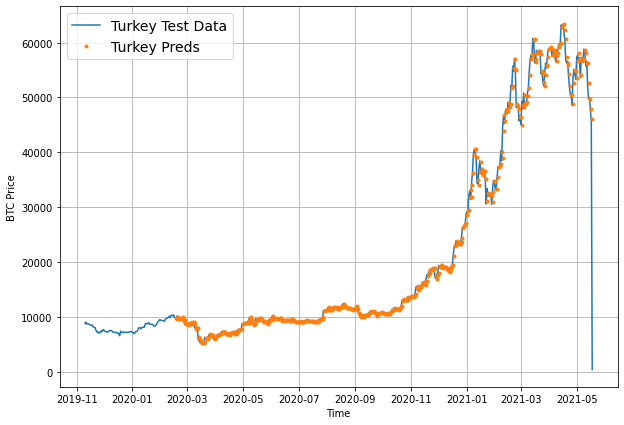

In [ ]:
plt.figure(figsize = (10, 7))
offset = 100
plot_time_series(timesteps = btc_timesteps_turkey[-len(X_test):],
                 values = btc_price_turkey[-len(y_test):],
                 label = "Turkey Test Data",
                 format = "-")
plot_time_series(timesteps = btc_timesteps_turkey[-len(X_test):],
                 values = turkey_preds,
                 label = "Turkey Preds",
                 start = offset)

## Compare models

In [ ]:
# Comapre different model results (w = window, h = horizon, e.g., w = 7 means a window of 7)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30,h7": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_Conv1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "model_7_NBEATS": model_7_results,
                              "model_8_ensemble": ensemble_results,
                              "model_10_turkey": turkey_results}).T
model_results.head(10)

,mae,mse,rmse,mape,mase
naive_model,567.980225,1.147547e+06,1071.236206,2.516525,0.999570
model_1_dense_w7_h1,568.951111,1.171744e+06,1082.471069,2.544898,0.999490
"model_2_dense_w30,h7",605.874084,1.273361e+06,1128.432861,2.726445,1.059074
model_3_dense_w30_h7,1237.506470,5.405198e+06,1425.747803,5.558879,2.202073
model_4_Conv1D,570.828430,1.176671e+06,1084.744751,2.559336,1.002787
model_5_LSTM,594.602966,1.267232e+06,1125.713867,2.671757,1.044553
model_6_multivariate,567.889893,1.164816e+06,1079.266602,2.546076,0.997625
model_7_NBEATS,573.902222,1.164275e+06,1079.015503,2.584141,1.008187
model_8_ensemble,565.504639,1.141798e+06,1068.549561,2.571716,0.993435
model_10_turkey,17120.296875,6.137617e+08,23696.546875,121.235748,26.493715


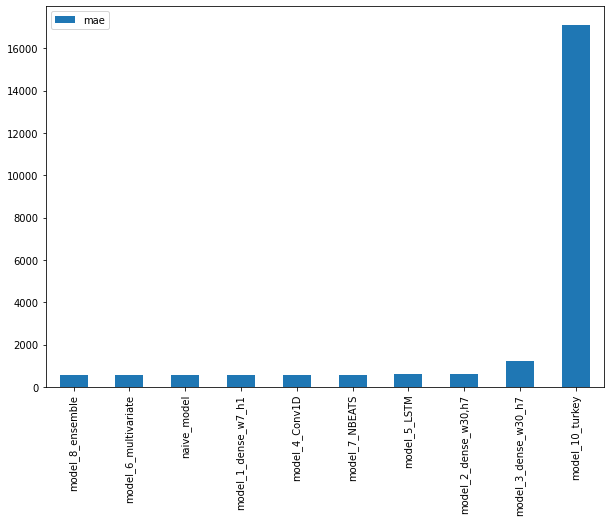

In [ ]:
# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by = "mae").plot(figsize = (10, 7), kind = "bar")